In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
%matplotlib inline

# 冷却の結果

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [3]:
raw = RawCam(path='/mnt/recordings/ExperimentData/20181009-1/C001H001S0008/', cam_type='sa4',
             image_width=256, image_height=256, frame_start=500, frame_end=1500)

In [21]:
vmem = VmemMap(raw)
vmem.smooth(size=50)
vmem.setDiffRange(diff_min=40)
vmem.setRectROI(top=50)

In [ ]:
plt.imshow(vmem.data[310, :, :], cmap=vmem.cmap)
plt.colorbar()
# plt.plot(122, 200, 'o', color='black')

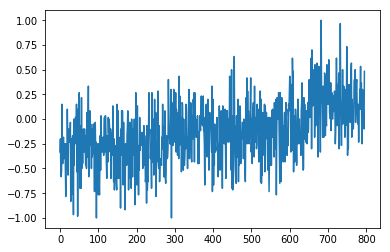

In [16]:
# plt.plot(vmem.data[:, 122, 200])
plt.plot(vmem.data[4:800, 200, 80])

In [192]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/vmem', img_type='png', skip=1)

In [193]:
cmd = 'ffmpeg -r 30 -y -i "{0}/vmem/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/vmem_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/')
subprocess.call(cmd, shell=True)

0

In [194]:
pmap = PhaseMap(vmem, shrink=4)
pmap.smooth(size=5)

In [190]:
pmap.saveImage('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/pmap', img_type='png', skip=1)

In [191]:
cmd = 'ffmpeg -r 30 -y -i "{0}/pmap/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/pmap_movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/experiment/20180426-2/C001H001S0014/')
subprocess.call(cmd, shell=True)

0